In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

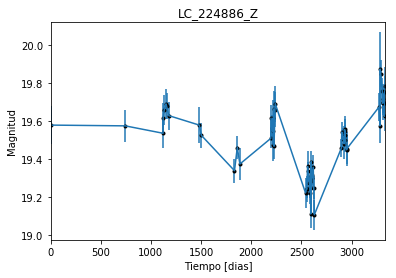

In [2]:
data = np.genfromtxt('LC_224886_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_224886_Z')
plt.savefig("LC_224886_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

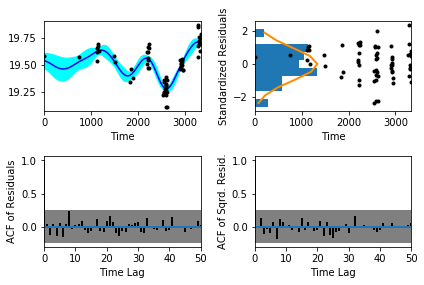

In [5]:
sample.assess_fit()

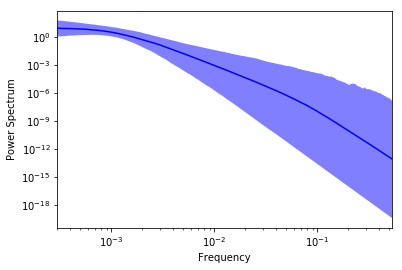

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

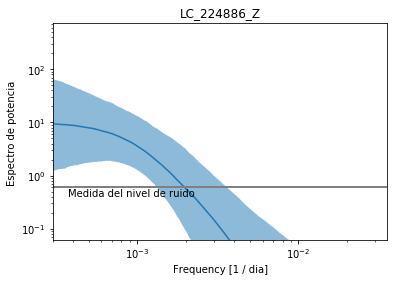

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_224886_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_224886_Z')

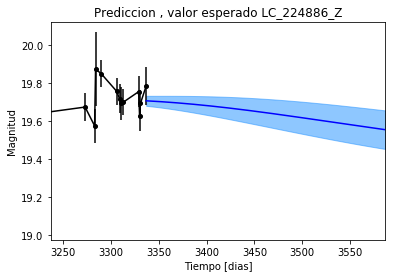

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_224886_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_224886_Z')

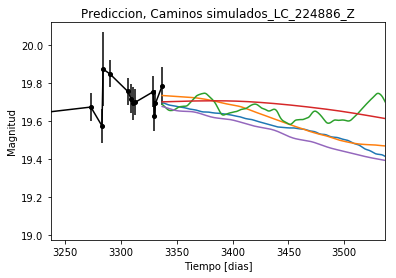

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_224886_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


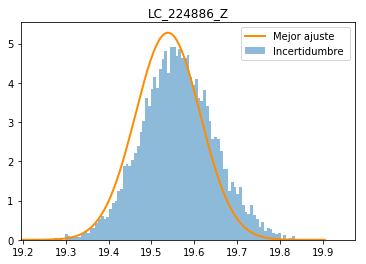

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_224886_Z')
plt.savefig("Mejor_ajuste_LC_224886_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_224886_Z')

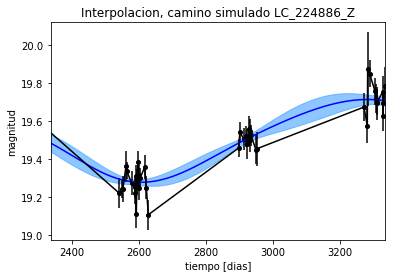

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_224886_Z')

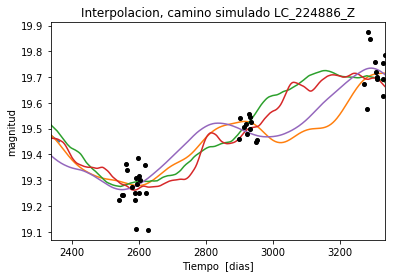

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_224886_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 465.996373746
Median: 0.00407279896173
Standard deviation: 0.186168900253
68% credibility interval: [ 0.00052558  0.1104763 ]
95% credibility interval: [  3.24171579e-04   7.70990130e-01]
99% credibility interval: [  3.04873446e-04   1.01059734e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 898.77992158
Median: 0.00102375431269
Standard deviation: 0.0516575258757
68% credibility interval: [ 0.00041601  0.0087712 ]
95% credibility interval: [ 0.00031483  0.10935136]
99% credibility interval: [  3.01793797e-04   3.78227835e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 241.096197514
Median: 0.00971275876977
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 599.0313548
Median: 99.6157107185
Standard deviation: 1.69240266477
68% credibility interval: [  97.84143912  100.96650875]
95% credibility interval: [  95.23212788  102.05547732]
99% credibility interval: [  93.42781128  102.37354148]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 332.317303528
Median: 0.396884094449
Standard deviation: 1.96229514922
68% credibility interval: [ 0.03363151  3.30855095]
95% credibility interval: [ 0.01177269  6.650107  ]
99% credibility interval: [ 0.00926139  9.02875273]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 711.037165677
Median: 0.0948283494339
Standard deviation: 7.0778490216
68% credibility interval: [  2.39450885e-03   2.97552100e+00]
95% credibility interval: [  1.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3652.08647734
Median: 8.54135230304e-31
Standard deviation: 3.94680441015e+66
68% credibility interval: [  1.01606219e-69   1.04120215e+01]
95% credibility interval: [  3.34705804e-92   1.25769753e+64]
99% credibility interval: [  1.26648347e-97   2.00940911e+67]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2157.1032202
Median: 19.5280182941
Standard deviation: 0.0789781151835
68% credibility interval: [ 19.47454257  19.5927317 ]
95% credibility interval: [ 19.38714304  19.7005421 ]
99% credibility interval: [ 19.27434629  19.83010067]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.105364452
Median: 0.000964362915237
Standard deviation: 0.205969718372
68% credibility interval: [ 0.          0.14765816]
95% credibility interval: [ 0.          0.80669383]
99% credibility interval: [ 0.          0.99154137]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.105364452
Median: 0.000964362915237
Standard deviation: 0.205969718372
68% credibility interval: [ 0.          0.14765816]
95% credibility interval: [ 0.          0.80669383]
99% credibility interval: [ 0.          0.99154137]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 525.467250018
Median: 0.0
Standard deviation: 0.000419557446499
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 599.0313548
Median: 99.6157107185
Standard deviation: 1.69240266477
68% credibility interval: [  97.84143912  100.96650875]
95% credibility interval: [  95.23212788  102.05547732]
99% credibility interval: [  93.42781128  102.37354148]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1417.21018604
Median: 0.0220449881074
Standard deviation: 0.0293037529495
68% credibility interval: [ 0.01251175  0.04307076]
95% credibility interval: [ 0.00818799  0.10200386]
99% credibility interval: [ 0.00642344  0.19416231]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2718.47797647
Median: 0.955395505252
Standard deviation: 0.13907881809
68% credibility interval: [ 0.83744621  1.10647937]
95% credibility interval: [ 0.73840172  1.27812148]
99% credibility interval: [ 0.6806295   1.39703905]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1908.86421532
Median: 9.99576214825e-06
Standard deviation: 0.0523507651785
68% credibility interval: [  8.56031929e-09   6.90722629e-04]
95% credibility interval: [  2.62166342e-69   1.50442205e-02]
99% credibility interval: [  1.42385846e-73   1.88041303e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 465.996373746
Median: (-0.0255901505954+0j)
Standard deviation: 1.74444563046
68% credibility interval: [-0.69414307-0.17665514j -0.00330233-0.05637978j]
95% credibility interval: [ -4.84427386e+00+0.j          -2.03683011e-03-0.00313168j]
99% credibility interval: [ -6.34977036e+00+0.j         -1.91557636e-03-0.1931609j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 898.77992158
Median: (-0.00643243805566+0j)
Standard deviation: 1.33422703775
68% credibility interval: [-0.05511110+0.j -0.00261385+0.j]
95% credibility interval: [-0.68707483 +2.82394442e+00j -0.00197812 +2.04297137e-03j]
99% credibility interval: [ -2.37647558e+00+3.85405266j  -1.89622635e-03+0.j        ]
Posterior summary for parameter ar_roots  elem